In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file = "emopain_"
mehtod = "srnn"
suffix = "_old_bszs" # ""
file += mehtod + suffix
data_types = ["emg", "energy", "angle"]
encoders = ["STL-V", "STL-S", "rate", "latency"]

data = []
filenames = []
for data_type in data_types:
    for encoder in encoders:
        # Exception for bsz results for STL-S [32, 8, 16]
        # if encoder == "STL-S":
        #     results = pd.read_csv(f'../results/{file}_bsz/results_{data_type}_{encoder}.csv', index_col=0)
        # else:
        results = pd.read_csv(f'../results/{file}/results_{data_type}_{encoder}.csv', index_col=0)
        filenames.append(f"{file} {data_type} {encoder}")
        print(filenames[-1])
        try:
            results.set_index('fold', inplace=True)
        except:
            print('.')
        results.index = results.index.astype(int)
        # deduplicate the fold index
        results = results[~results.index.duplicated(keep='first')]
        try:
            results['test_preds'] = results['test_preds'].apply(lambda x: int(x.strip('[]')))
            results['test_labels'] = results['test_labels'].apply(lambda x: int(x.strip('[]')))
        except:
            results['test_preds'] = results['ts_pred']
            results['test_labels'] = results['ts_label']
            results["test_acc"] = results["ts_acc"]
        print(f'{data_type}_{encoder}: {results.shape}')
        results.sort_index()
        
        data.append(results)

data[0].tail()

emopain_srnn_old_bszs emg STL-V
.
emg_STL-V: (46, 9)
emopain_srnn_old_bszs emg STL-S
.
emg_STL-S: (46, 9)
emopain_srnn_old_bszs emg rate
.
emg_rate: (46, 9)
emopain_srnn_old_bszs emg latency
.
emg_latency: (46, 9)
emopain_srnn_old_bszs energy STL-V
.
energy_STL-V: (46, 9)
emopain_srnn_old_bszs energy STL-S
.
energy_STL-S: (46, 9)
emopain_srnn_old_bszs energy rate
.
energy_rate: (46, 9)
emopain_srnn_old_bszs energy latency
.
energy_latency: (46, 9)
emopain_srnn_old_bszs angle STL-V
.
angle_STL-V: (46, 9)
emopain_srnn_old_bszs angle STL-S
.
angle_STL-S: (46, 9)
emopain_srnn_old_bszs angle rate
.
angle_rate: (46, 9)
emopain_srnn_old_bszs angle latency
.
angle_latency: (46, 9)


,tr_acc,val_acc,ts_acc,ts_pred,ts_label,sparsity,test_preds,test_labels,test_acc
subj,,,,,,,,,
41,81.25,44.444,100.0,0,0,0.026704,0,0,100.0
42,75.00,55.556,0.0,0,1,0.050480,0,1,0.0
43,87.50,55.556,100.0,0,0,0.020734,0,0,100.0
44,81.25,55.556,100.0,0,0,0.013588,0,0,100.0
45,75.00,66.667,0.0,0,1,0.013910,0,1,0.0


In [68]:

results_dict = {}
for i, d in enumerate(data):
    file, data_type, encoder = filenames[i].split(" ")
    filename = f"{file}_{data_type}_{encoder}"
    print(file, data_type, encoder)

    accuracies = d["test_acc"]
    sparsities = d["sparsity"]
    preds = d["test_preds"].to_numpy().flatten()
    labels = d["test_labels"].to_numpy().flatten()
    print(np.mean(accuracies))
    print(np.mean(sparsities))
    
    try:
        results_dict[filename]["accuracies"].append(np.mean(accuracies))
        results_dict[filename]["sparsities"].append(np.mean(sparsities))
        results_dict[filename]["labels"].append(labels)
        results_dict[filename]["preds"].append(preds)
    except:
        results_dict[filename] = {"accuracies": [np.mean(accuracies)],
                                  "sparsities": [np.mean(sparsities)],
                                  "preds": [preds],
                                  "labels": [labels]}


emopain_srnn_old_bszs emg STL-V
71.73913043478261
0.016686938405797068
emopain_srnn_old_bszs emg STL-S
56.52173913043478
0.21833759057971008
emopain_srnn_old_bszs emg rate
60.869565217391305
0.08631153985507242
emopain_srnn_old_bszs emg latency
76.08695652173913
0.09999999999999995
emopain_srnn_old_bszs energy STL-V
71.73913043478261
0.10158492149758447
emopain_srnn_old_bszs energy STL-S
73.91304347826087
0.41375847222222223
emopain_srnn_old_bszs energy rate
63.04347826086956
0.17949096316425117
emopain_srnn_old_bszs energy latency
67.3913043478261
0.09999999999999995
emopain_srnn_old_bszs angle STL-V
76.08695652173913
0.1231422644927536
emopain_srnn_old_bszs angle STL-S
69.56521739130434
0.5233058725845412
emopain_srnn_old_bszs angle rate
67.3913043478261
0.222221268115942
emopain_srnn_old_bszs angle latency
71.73913043478261
0.09999999999999995


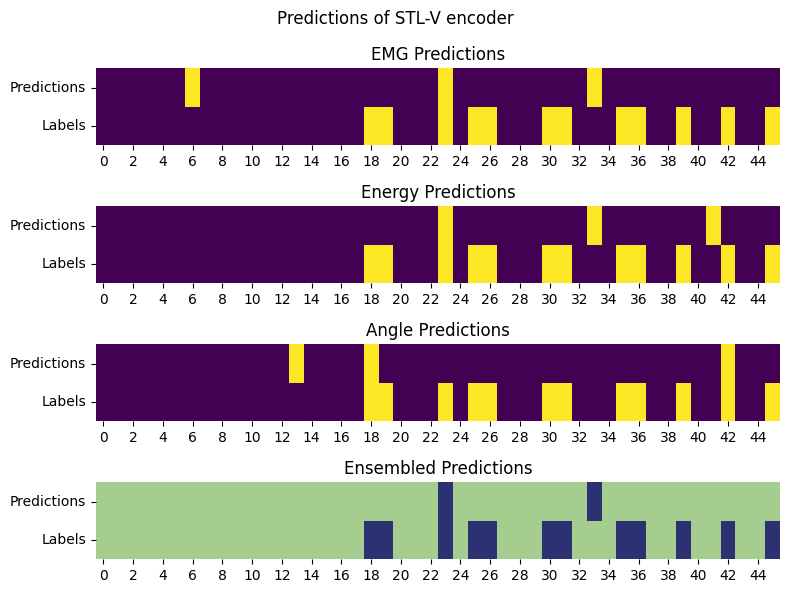

Ensemble Accuracy: 73.91
Ensemble AUC: 0.527
Ensemble F1 Score: 0.143 <- 0.500 & 0.083
Ensemble MCC: 0.116
Harmonic mean sparsity: 0.039 <- 0.017 & 0.102 & 0.123


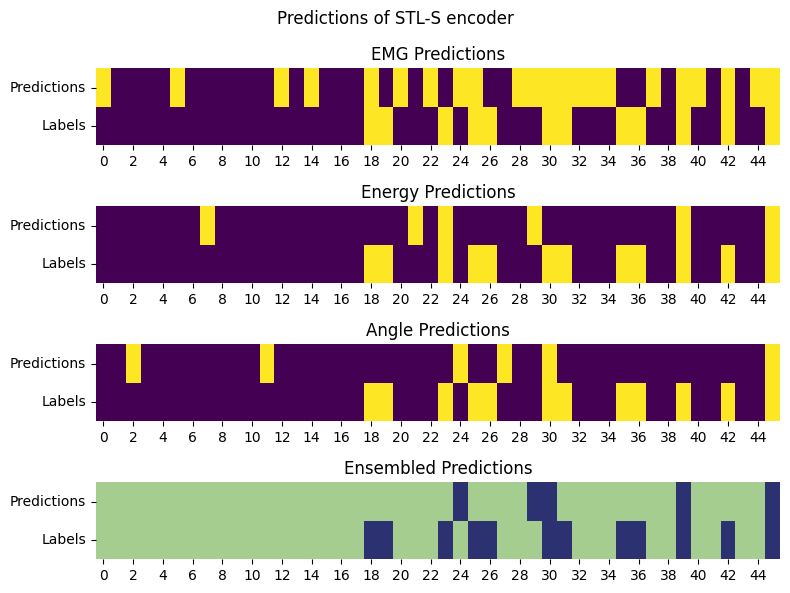

Ensemble Accuracy: 76.09
Ensemble AUC: 0.596
Ensemble F1 Score: 0.353 <- 0.600 & 0.250
Ensemble MCC: 0.270
Harmonic mean sparsity: 0.337 <- 0.218 & 0.414 & 0.523


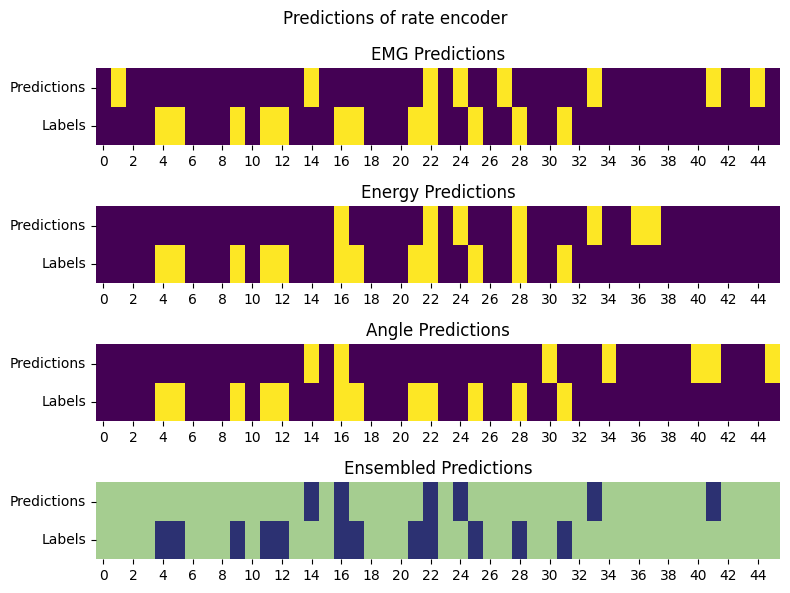

Ensemble Accuracy: 69.57
Ensemble AUC: 0.525
Ensemble F1 Score: 0.222 <- 0.333 & 0.167
Ensemble MCC: 0.064
Harmonic mean sparsity: 0.139 <- 0.086 & 0.179 & 0.222


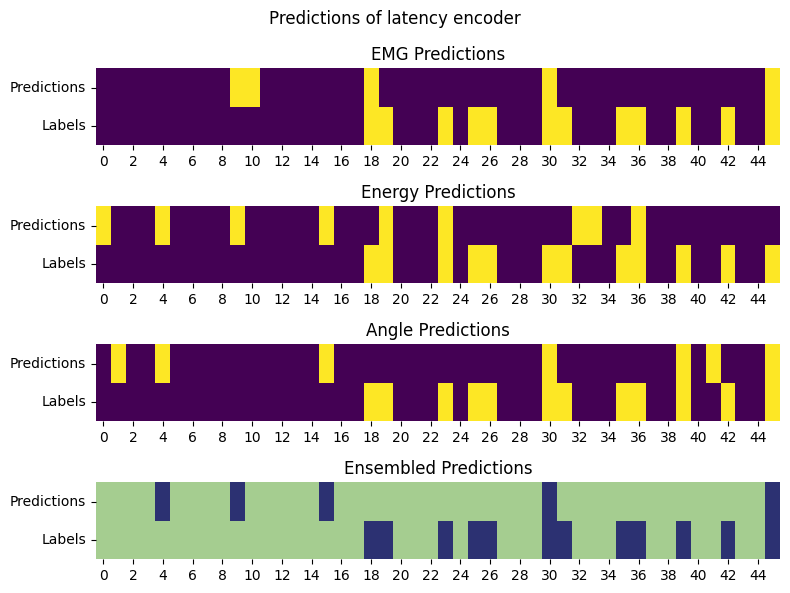

Ensemble Accuracy: 71.74
Ensemble AUC: 0.539
Ensemble F1 Score: 0.235 <- 0.400 & 0.167
Ensemble MCC: 0.111
Harmonic mean sparsity: 0.100 <- 0.100 & 0.100 & 0.100


In [69]:
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, auc, precision_recall_curve, f1_score, precision_score, recall_score, matthews_corrcoef
from scipy.stats import hmean

ensemble = {}
ensemble_preds_d = {encoder: [] for encoder in encoders}

for encoder in encoders:
    # Extract predictions and labels
    emg_preds = results_dict[f'{file}_emg_{encoder}']['preds'][0]
    energy_preds = results_dict[f'{file}_energy_{encoder}']['preds'][0]
    angle_preds = results_dict[f'{file}_angle_{encoder}']['preds'][0]
    labels = results_dict[f'{file}_emg_{encoder}']['labels'][0]  # Assuming labels are the same for all data types

    # Calculate accuracy weights
    emg_acc = results_dict[f'{file}_emg_{encoder}']['accuracies'][0]
    energy_acc = results_dict[f'{file}_energy_{encoder}']['accuracies'][0]
    angle_acc = results_dict[f'{file}_angle_{encoder}']['accuracies'][0]
    
    emg_f1 = f1_score(labels, emg_preds)
    energy_f1 = f1_score(labels, energy_preds)
    angle_f1 = f1_score(labels, angle_preds)
    
    emg_mcc = matthews_corrcoef(labels, emg_preds)
    energy_mcc = matthews_corrcoef(labels, energy_preds)
    angle_mcc = matthews_corrcoef(labels, angle_preds)

    weights = [emg_f1, energy_f1, angle_f1]

    # Perform accuracy-weighted majority voting
    ensemble_preds = np.round(
        (emg_preds * weights[0] + energy_preds * weights[1] + angle_preds * weights[2]) / sum(weights)
    ).astype(int)
    
    # Perform non-weighted majority voting
    ensemble_preds = np.round((emg_preds + energy_preds + angle_preds) / 3).astype(int)

    fig, axs = plt.subplots(4, 1, figsize=(8,6))

    sns.heatmap(np.vstack([emg_preds, labels]), ax=axs[0], cbar=False, cmap='viridis')
    axs[0].set_title('EMG Predictions')
    axs[0].set_yticklabels(['Predictions', 'Labels'])
    axs[0].tick_params(axis='y', rotation=0)

    sns.heatmap(np.vstack([energy_preds, labels]), ax=axs[1], cbar=False, cmap='viridis')
    axs[1].set_title('Energy Predictions')
    axs[1].set_yticklabels(['Predictions', 'Labels'])
    axs[1].tick_params(axis='y', rotation=0)

    sns.heatmap(np.vstack([angle_preds, labels]), ax=axs[2], cbar=False, cmap='viridis')
    axs[2].set_title('Angle Predictions')
    axs[2].set_yticklabels(['Predictions', 'Labels'])
    axs[2].tick_params(axis='y', rotation=0)

    sns.heatmap(np.vstack([ensemble_preds, labels]), ax=axs[3], cbar=False, cmap='crest')
    axs[3].set_yticklabels(['Predictions', 'Labels'])
    axs[3].tick_params(axis='y', rotation=0)
    axs[3].set_title('Ensembled Predictions')

    plt.suptitle(f"Predictions of {encoder} encoder")
    plt.tight_layout()
    plt.show()

    # Calculate the harmonic mean sparsity
    sparsities = [
        results_dict[f'{file}_emg_{encoder}']['sparsities'][0],
        results_dict[f'{file}_energy_{encoder}']['sparsities'][0],
        results_dict[f'{file}_angle_{encoder}']['sparsities'][0]
    ]

    harmonic_mean_sparsity = hmean(sparsities)

    # Calculate and print ensemble performance metrics
    ensemble_accuracy = accuracy_score(labels, ensemble_preds)
    # pr_curve = precision_recall_curve(labels, ensemble_preds)
    # ensemble_auc = auc(pr_curve[1], pr_curve[0])
    ensemble_auc = roc_auc_score(labels, ensemble_preds)
    ensemble_f1 = f1_score(labels, ensemble_preds)    
    ensemble_prec = precision_score(labels, ensemble_preds)
    ensemble_rec = recall_score(labels, ensemble_preds)
    ensemble_mcc = matthews_corrcoef(labels, ensemble_preds)

    print(f'Ensemble Accuracy: {ensemble_accuracy*100:.2f}')
    print(f'Ensemble AUC: {ensemble_auc:.3f}')
    print(f'Ensemble F1 Score: {ensemble_f1:.3f} <- {ensemble_prec:.3f} & {ensemble_rec:.3f}')
    print(f'Ensemble MCC: {ensemble_mcc:.3f}')
    print(f'Harmonic mean sparsity: {harmonic_mean_sparsity:.3f} <- {" & ".join([f"{s:.3f}" for s in sparsities])}')
    
    ensemble[encoder] = [ensemble_accuracy, ensemble_auc, ensemble_f1, ensemble_mcc, harmonic_mean_sparsity]
    
    encoder_preds = ensemble_preds.tolist()  # Convert for clarity (optional)
    ensemble_preds_d[encoder].append(encoder_preds)  # Append current predictions list
    ensemble_preds_d["labels"] = labels.tolist()  # Add labels to the dictionary

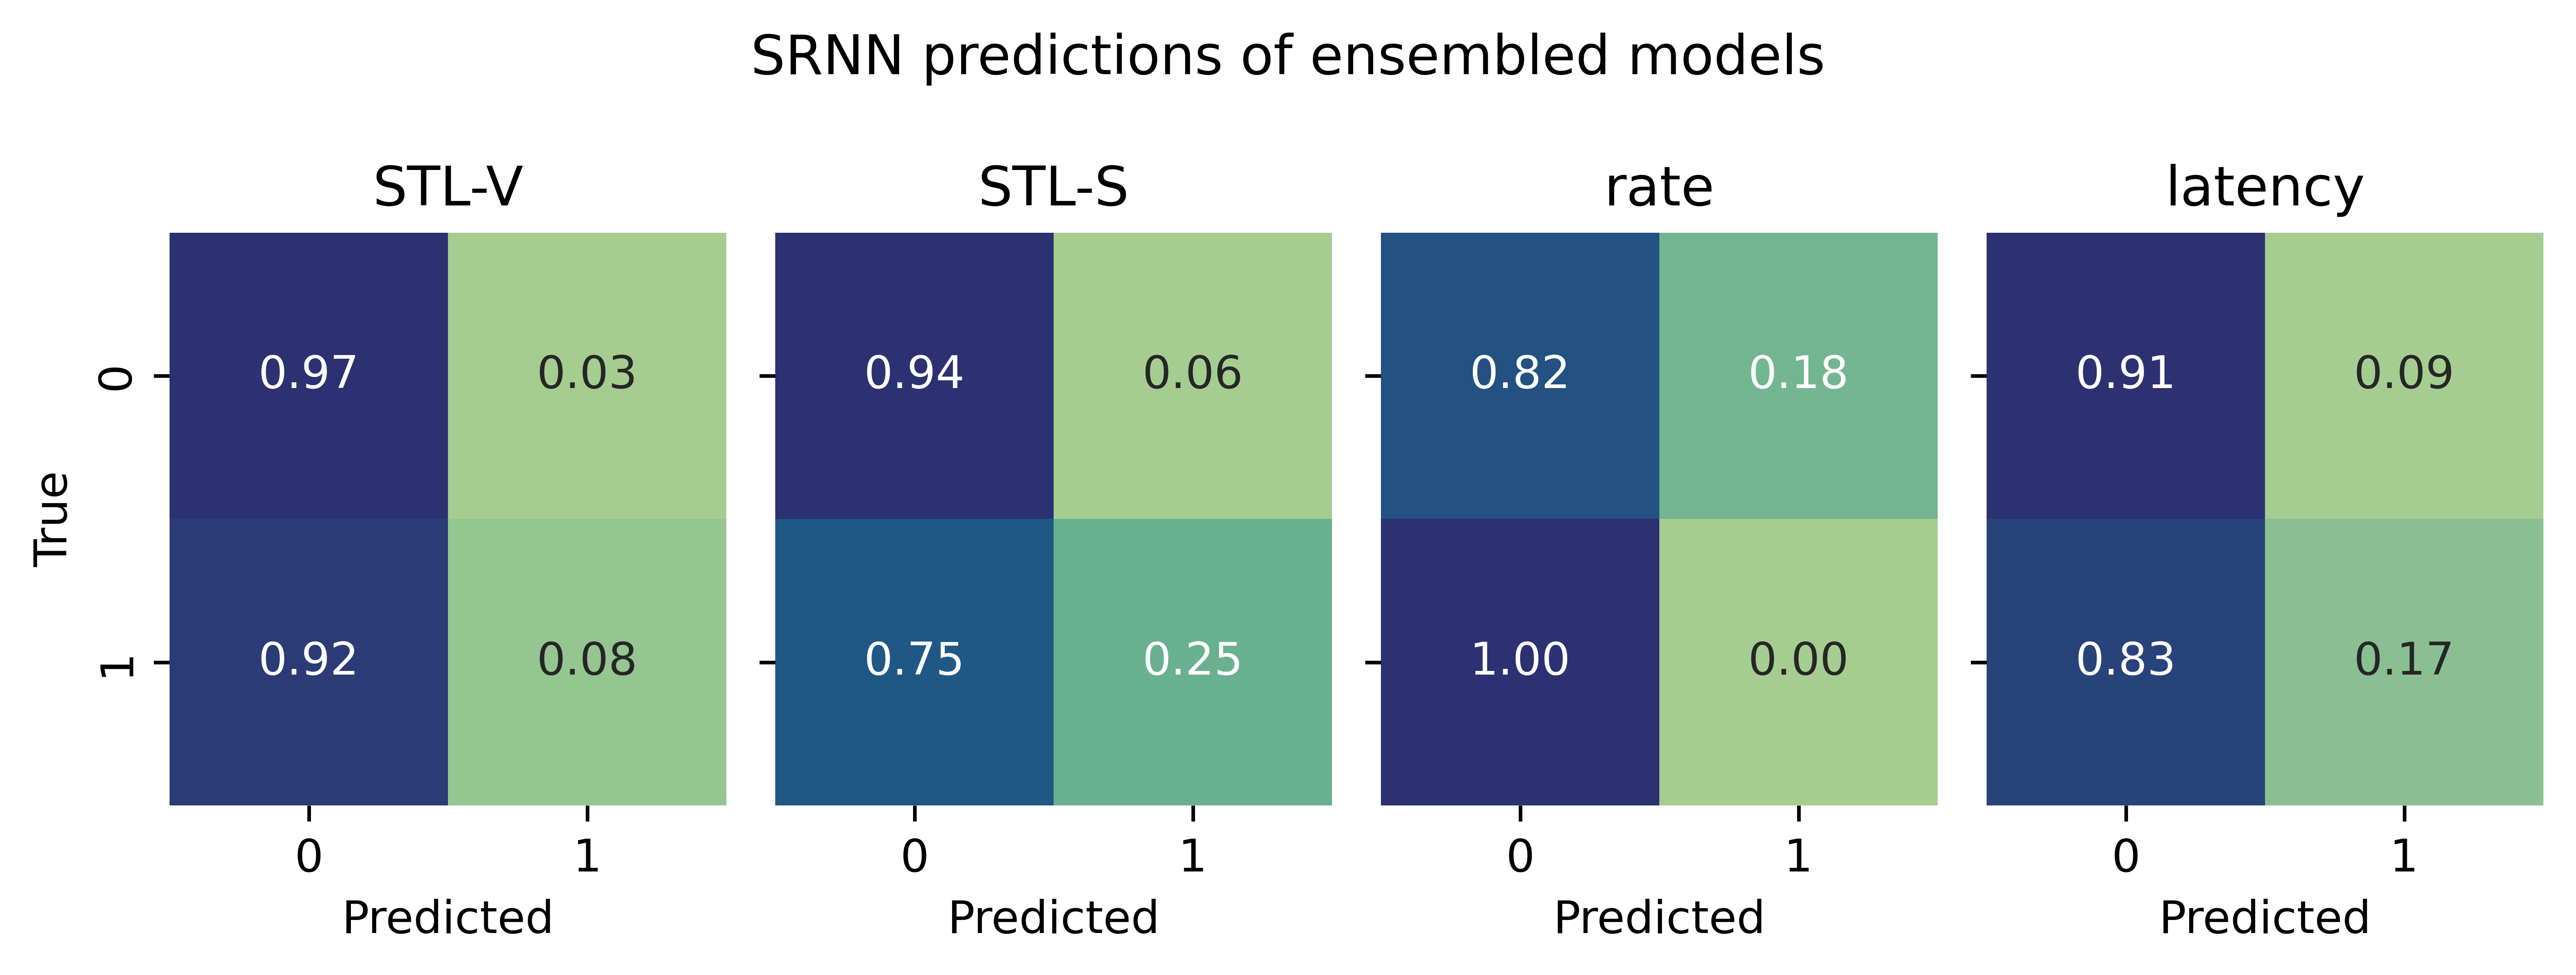

In [73]:
from sklearn.metrics import confusion_matrix

fig, axs = plt.subplots(1, 4, figsize=(8, 3), sharey=True, dpi=800)

for i, encoder in enumerate(encoders):
    # Plot confusion matrices
    labels = ensemble_preds_d["labels"]
    cm = confusion_matrix(labels, ensemble_preds_d[encoder][0], normalize='true')
    colorbar=False
    if i == len(encoders):
        colorbar = True
    sns.heatmap(cm, ax=axs[i], cbar=colorbar, cmap='crest', annot=True, fmt='.2f')
    axs[i].set_title(f'{encoder}')
    axs[i].set_xlabel('Predicted')
    if i==0:
        axs[i].set_ylabel('True')
plt.suptitle(f"{mehtod.upper()} predictions of ensembled models")
plt.tight_layout()
plt.show()

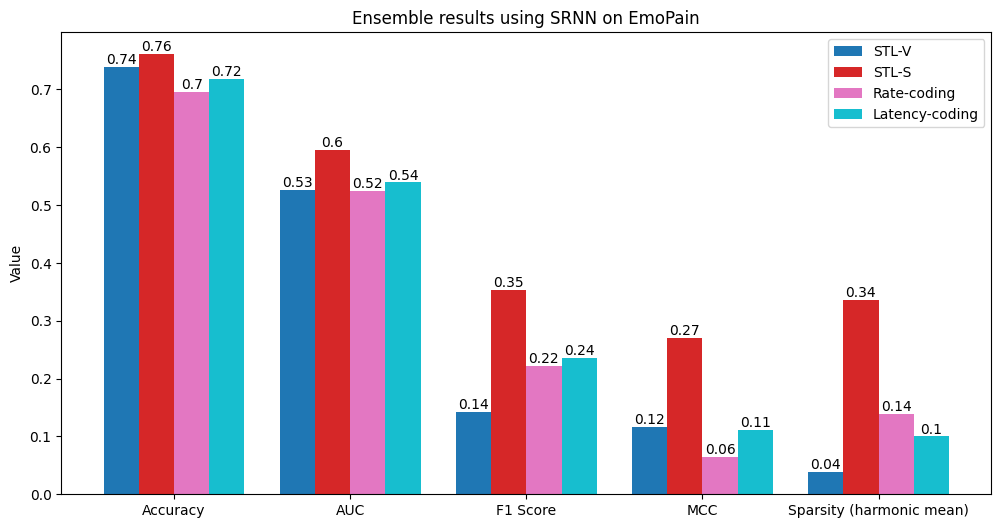

In [71]:
labels = list(ensemble.keys())
values = np.array(list(ensemble.values()))

x = np.arange(values.shape[1])
width = 0.2

colors = plt.cm.tab10(np.linspace(0, 1, len(ensemble)))

fig, ax = plt.subplots(figsize=(12, 6))

for i, (key, values) in enumerate(ensemble.items()):
    if key == "rate": key = "Rate-coding"
    if key == "latency": key = "Latency-coding"
    bars = ax.bar(x + i * width, values, width, label=key, color=colors[i])
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), 
                va='bottom', ha='center')

ax.set_ylabel('Value')
ax.set_title(f'Ensemble results using {mehtod.upper()} on EmoPain')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(["Accuracy", "AUC", "F1 Score", "MCC", "Sparsity (harmonic mean)"])
ax.legend()

plt.show()


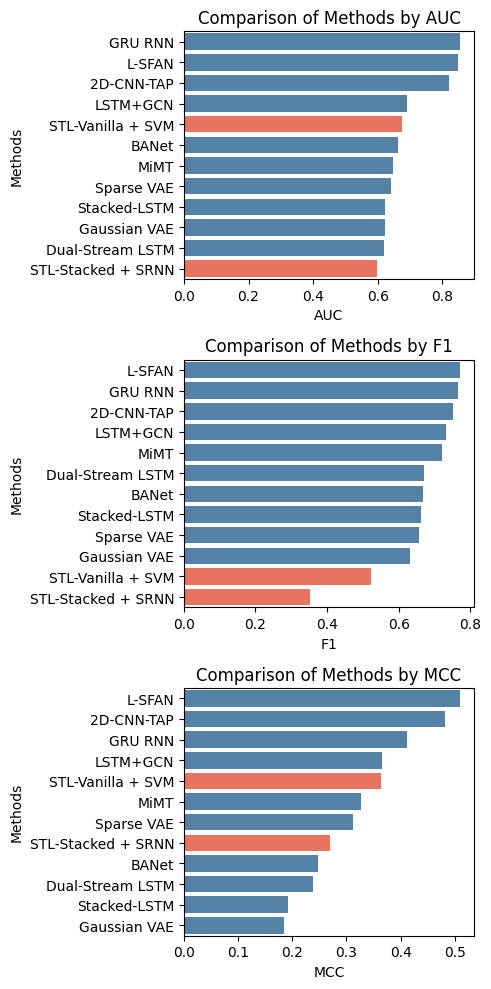

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
methods = [
    'Stacked-LSTM', 'Dual-Stream LSTM', 'BANet', 'MiMT', 'LSTM+GCN', 
    'Sparse VAE', 'Gaussian VAE', 'GRU RNN', '2D-CNN-TAP', 'L-SFAN',
    'STL-Vanilla + SVM', 'STL-Stacked + SRNN'
]
auc = [0.622, 0.618, 0.663, 0.648, 0.690, 0.641, 0.622, 0.855, 0.819, 0.849, 0.676, 0.596]
f1 = [0.662, 0.671, 0.668, 0.722, 0.731, 0.658, 0.631, 0.765, 0.752, 0.772, 0.522, 0.353]
mcc = [0.192, 0.238, 0.247, 0.327, 0.365, 0.312, 0.185, 0.411, 0.481, 0.510, 0.363, 0.270]

# DataFrame
df = pd.DataFrame({
    'Methods': methods,
    'AUC': auc,
    'F1': f1,
    'MCC': mcc
})

# Plotting function
def plot_metric(ax, metric, title, highlight):
    sorted_df = df.sort_values(by=metric, ascending=False)
    colors = ['#FF6347' if m in highlight else '#4682B4' for m in sorted_df['Methods']]
    
    sns.barplot(ax=ax, x=sorted_df[metric], y=sorted_df['Methods'], hue=sorted_df["Methods"], palette=colors)
    ax.set_title(title)
    ax.set_xlabel(metric)
    ax.set_ylabel('Methods')

# Highlight proposed methods
highlight = ['STL-Vanilla + SVM', 'STL-Stacked + SRNN']

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(5, 10))

# Plot each metric
plot_metric(axes[0], 'AUC', 'Comparison of Methods by AUC', highlight)
plot_metric(axes[1], 'F1', 'Comparison of Methods by F1', highlight)
plot_metric(axes[2], 'MCC', 'Comparison of Methods by MCC', highlight)

plt.tight_layout()
plt.show()
